In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [2]:
# Load
X = pd.read_csv('./Training Data/Linear_X_Train.csv')
y = pd.read_csv('./Training Data/Linear_Y_Train.csv')
# Convert X,Y to Numpy arrays
X = X.values
y = y.values
# Normalisation
u = X.mean()
std = X.std()
X = (X-u)/std

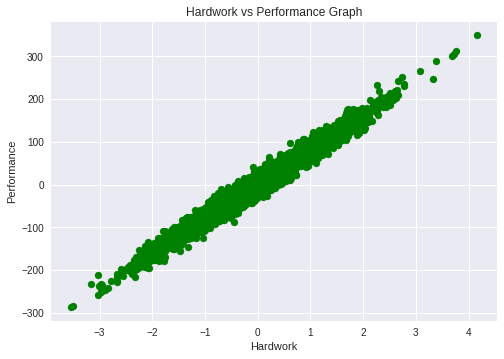

In [3]:
# Visualise
plt.style.use('seaborn')
plt.scatter(X,y,color='green')
plt.title("Hardwork vs Performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

In [4]:
X.shape, y.shape

((3750, 1), (3750, 1))

In [5]:
X

array([[-0.25352061],
       [-0.55541377],
       [ 1.07380656],
       ...,
       [-0.26950343],
       [ 1.72730762],
       [-0.4575866 ]])

**Linear Regression**

In [5]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2        
    return (total_error/m)

def gradientDescent(X,Y,max_steps=100,learning_rate =0.1):  
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    for i in range(max_steps):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)[0]
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        
    return theta,error_list,theta_list

In [6]:
theta,error_list,theta_list = gradientDescent(X,y)

In [7]:
error_list

[6576.35005246196,
 5363.125102574931,
 4380.412893166487,
 3584.4160035456366,
 2939.658522952752,
 2417.404963672508,
 1994.3795806555281,
 1651.7290204117544,
 1374.1820666143055,
 1149.3690340383696,
 967.2704776518652,
 819.770646978796,
 700.2957841336078,
 603.5211452290067,
 525.1336877162773,
 461.6398471309694,
 410.20983625687,
 368.55152744884856,
 334.80829731435097,
 307.47628090540843,
 285.33734761416457,
 267.4048116482566,
 252.87945751587242,
 241.11392066864,
 231.5838358223823,
 223.86446709691373,
 217.61177842928484,
 212.54710060850397,
 208.4447115736724,
 205.1217764554589,
 202.43019900970543,
 200.25002127864602,
 198.48407731648712,
 197.05366270713802,
 195.8950268735658,
 194.95653184837263,
 194.19635087796493,
 193.58060429193594,
 193.08184955725244,
 192.67785822215873,
 192.35062524073192,
 192.08556652577707,
 191.87086896666273,
 191.69696394378104,
 191.55610087524585,
 191.4420017897342,
 191.34958153046787,
 191.2747211204641,
 191.2140841883591

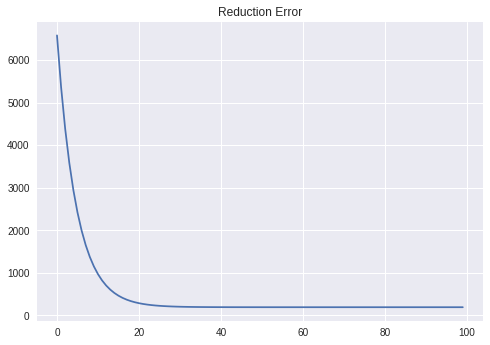

In [8]:
plt.plot(error_list)
plt.title("Reduction Error")
plt.show()

**Predction**

In [9]:
y_ = hypothesis(X,theta)

In [10]:
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


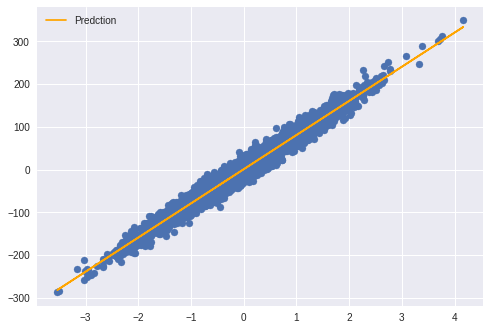

In [11]:
#Training + Predctions
plt.scatter(X,y)
plt.plot(X,y_,color='orange',label='Predction')
plt.legend()
plt.show()

In [12]:
#Testing
X_test = pd.read_csv('./Test Cases/Linear_X_Test.csv').values
y_test = hypothesis(X_test,theta)
y_test.shape

(1250, 1)

In [13]:
df = pd.DataFrame(data=y_test,columns=['y'])
df.to_csv('Result.csv',index=False)

**Computing Score**

In [14]:
def r2_score(Y,Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    score = (1-num/denom)
    return score*100

In [15]:
r2_score(y,y_)

97.09612226971643

**Surface Plots**

In [16]:
theta

array([ 0.6838508 , 79.90361453])

In [17]:
# Loss Actually 
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((y-y_)**2)/y.shape[0]

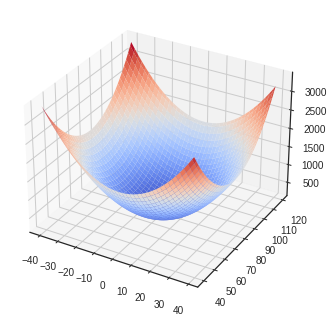

In [18]:
# Visualise the J (Loss)
plt.style.use('seaborn-white')
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='coolwarm')
plt.show()

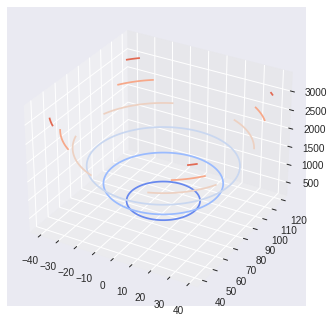

In [19]:
# Contour Plot 
plt.style.use('seaborn')
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='coolwarm')
plt.show()

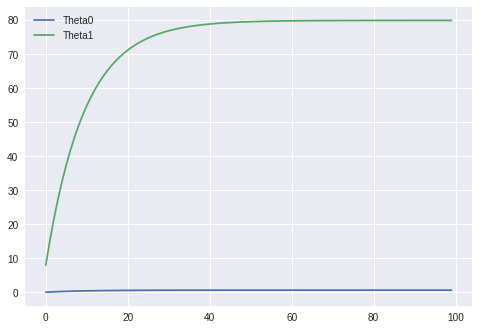

In [20]:
theta_list = np.array(theta_list)
plt.plot(theta_list[:,0],label="Theta0")
plt.plot(theta_list[:,1],label="Theta1")
plt.legend()
plt.show()

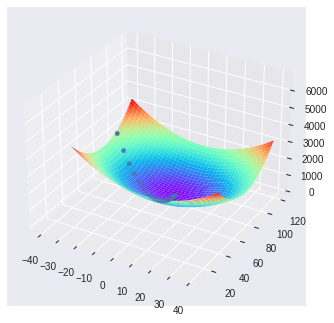

In [21]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

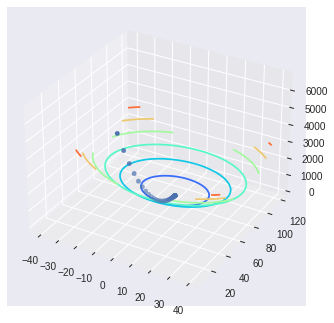

In [22]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

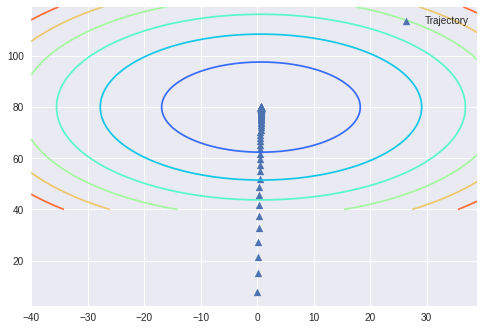

In [23]:
# 2D Contour Plot 
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1],marker='^',label='Trajectory')
plt.legend()
plt.show()

In [24]:
np.save("ThetaList.npy",theta_list)

In [25]:
Theta = np.load("ThetaList.npy")

In [27]:
t0 = Theta[:,0]
t1 = Theta[:,1]

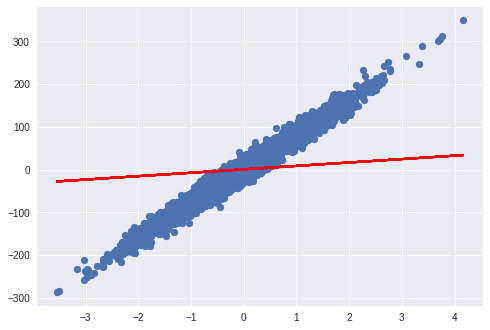

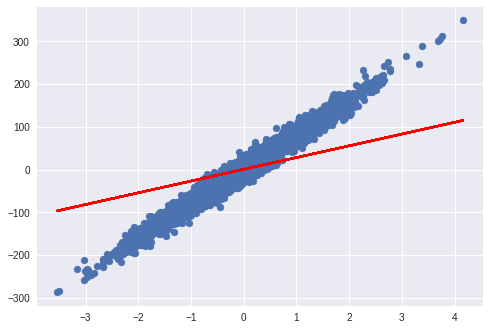

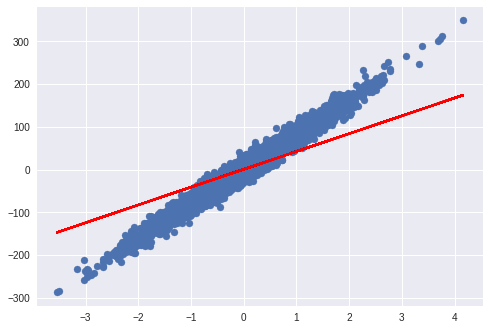

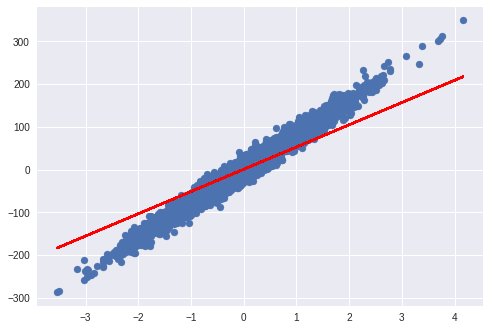

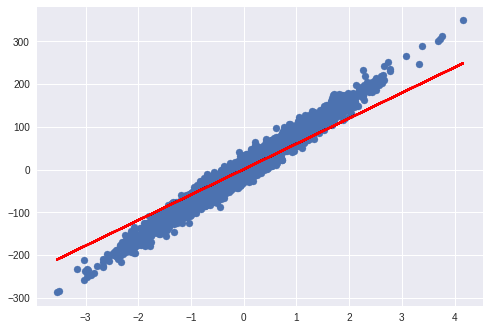

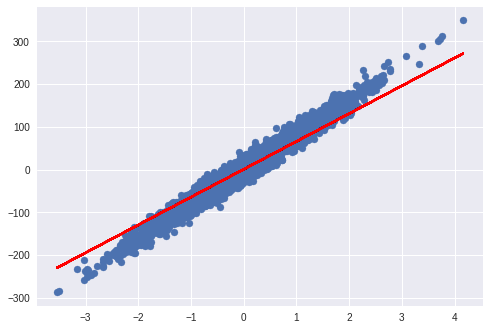

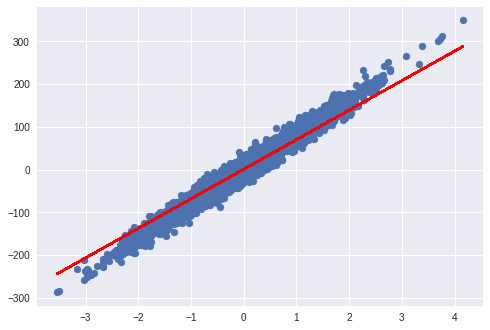

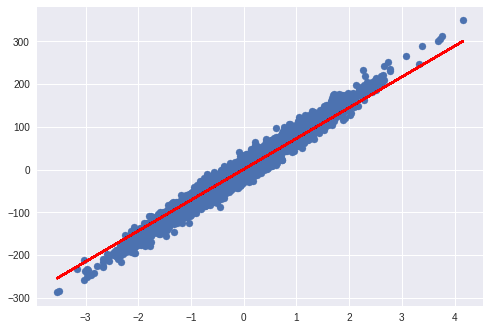

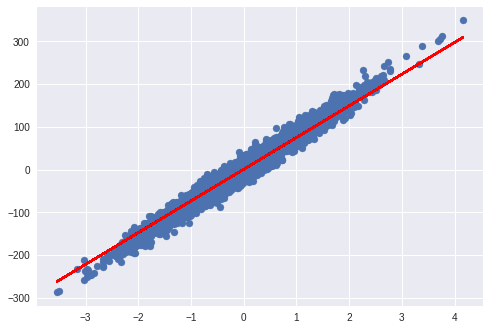

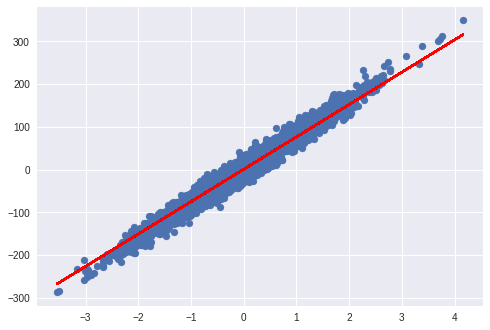

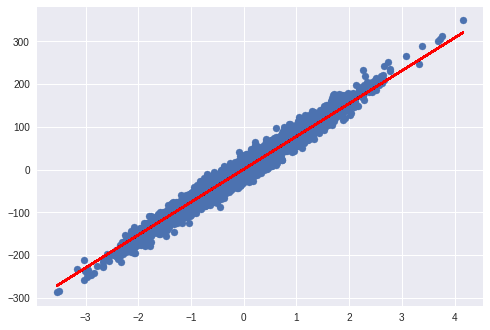

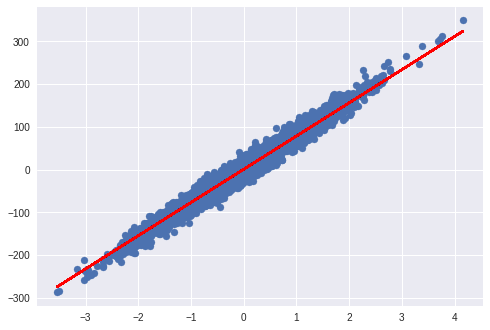

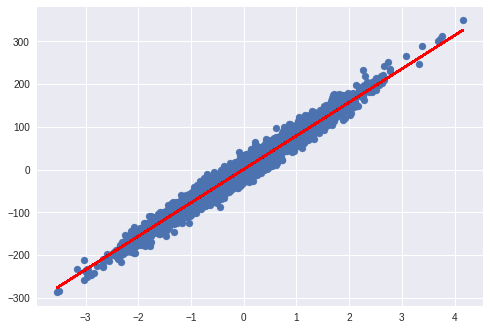

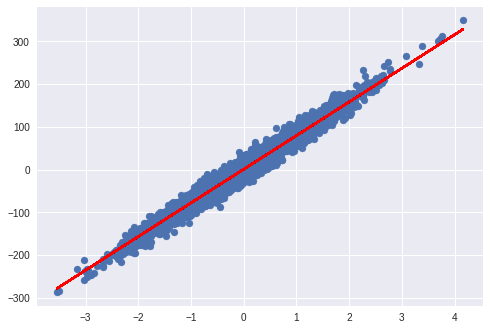

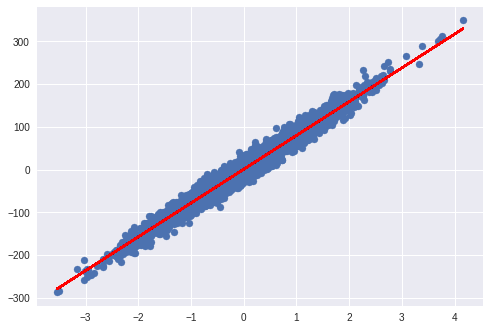

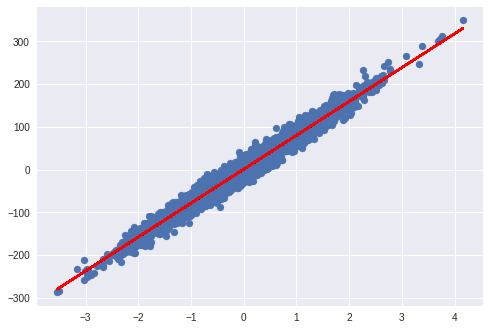

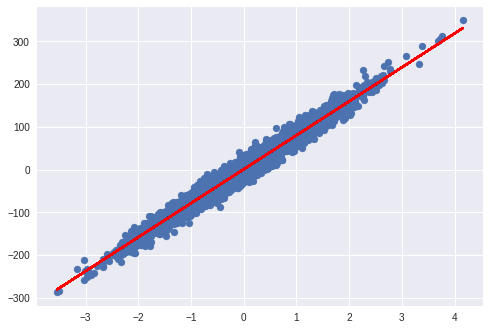

<Figure size 576x396 with 0 Axes>

In [30]:
plt.ion()
for i in range(0,50,3):
    z = t1[i]*X + t0
    plt.scatter(X,y)
    plt.plot(X,z,'red')
    plt.draw()
    plt.pause(1)
    plt.clf()